# AI_Assingment3
# Pandas를 이용하여 공공 데이터(https://www.data.go.kr/ 참조)를 대상으로 데이터 분석하기

# 1.데이터 읽기

## 1-1. 패키지 설치 및 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns

# 결측치 예측 라이브러리
try:
    import missingno as msno
except:
    !pip install missingno
    import missingno as msno

## 1-2. 데이터 불러오기

In [3]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
df = pd.read_csv("C:/Users/kang/Desktop/한국교통안전공단_자동차결함 리콜현황_20221231.csv"
                 , encoding="euc-kr")

## 1-3. 출력 설정

In [4]:
# 폰트 경로 설정 (실제 폰트 파일이 저장된 경로로 변경)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 프로퍼티 설정
font_prop = fm.FontProperties(fname=font_path)

# 폰트를 기본 폰트로 설정
plt.rcParams['font.family'] = font_prop.get_name()

# 상위 5개 데이터 출력
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


# 2. 데이터 정제

## 2-1. 결측치 확인

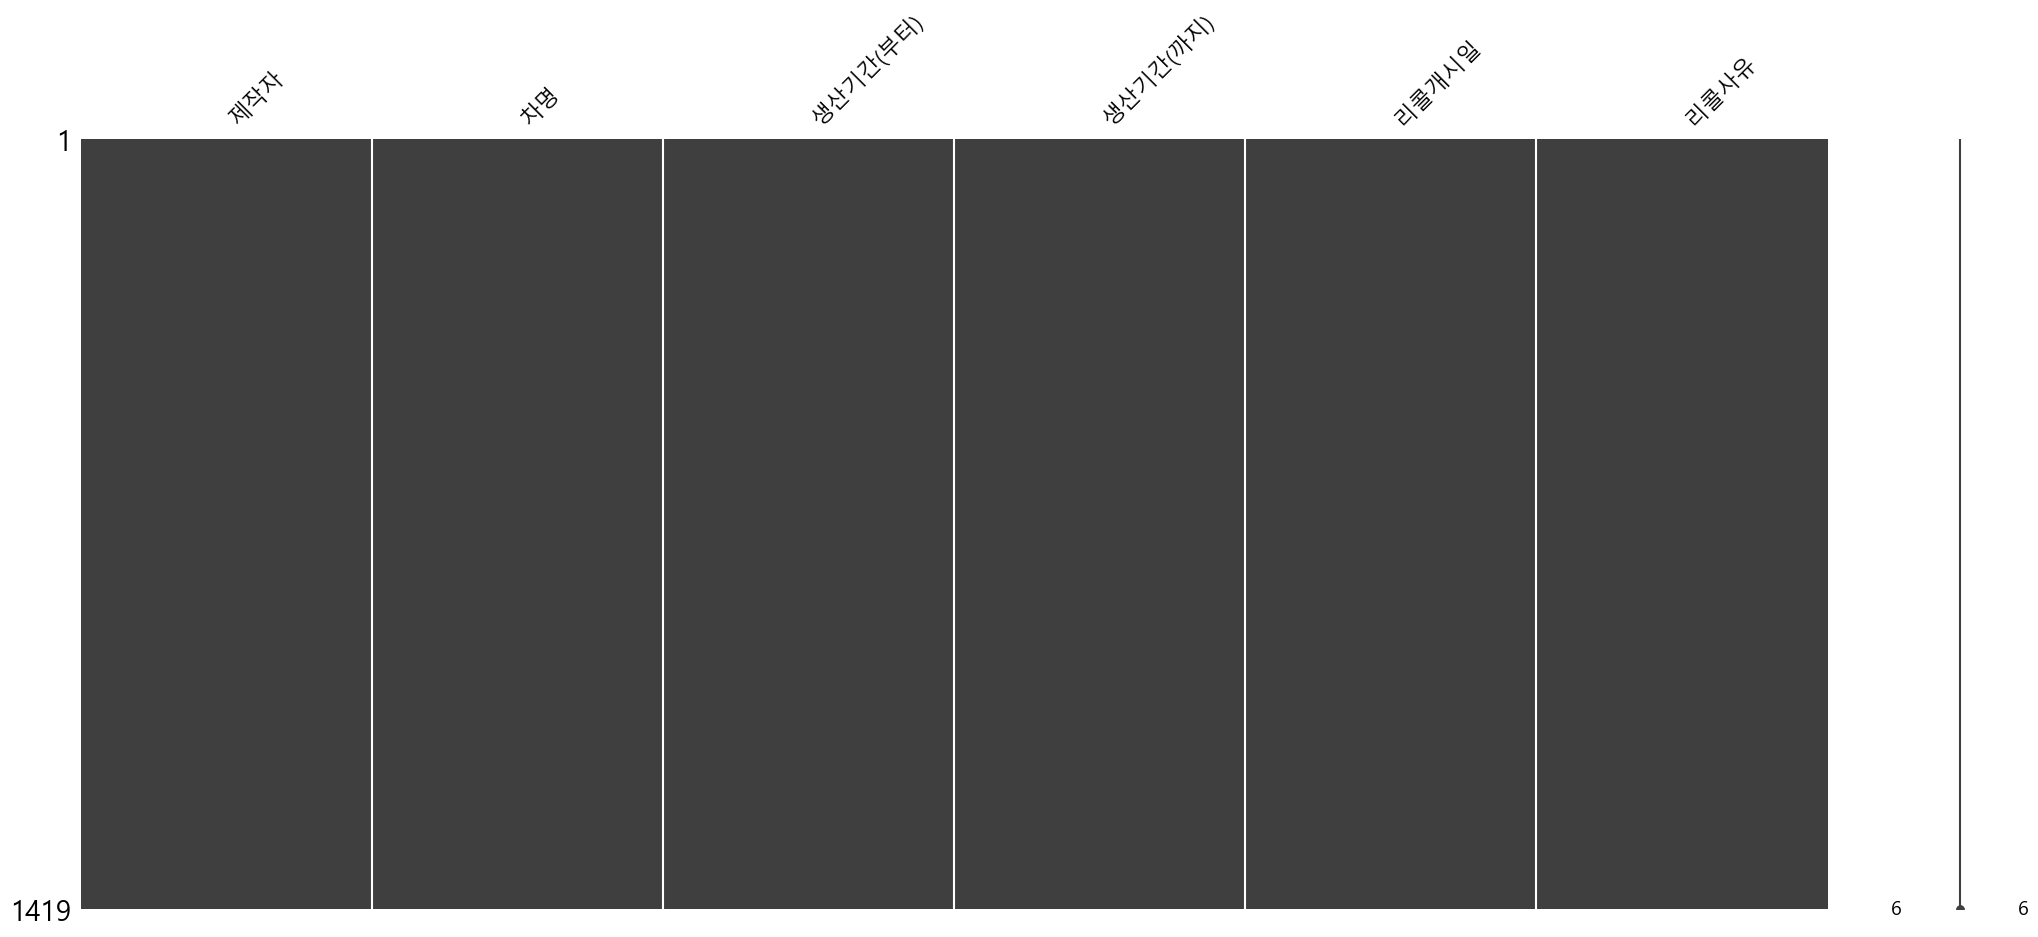

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [5]:
# 결측치 시각화
msno.matrix(df)
plt.show()

# 각 열 별로 결측치의 갯수를 반환합니다. (True:1, False:0)
df.isna().sum()

## 2-2. 중복값 확인

In [6]:
df[df.duplicated(keep=False)]

# 중복값 제거
print("Before:\t", len(df))
df = df.drop_duplicates()
print("After :\t", len(df))

Before:	 1419
After :	 1414


## 2-3. 기초적인 데이터 변형

In [7]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장이 느리기 때문에,
# apply() 함수를 이용하여 벡터의 연산을 진행합니다.
df['start_Year'] = df['생산기간(부터)'].apply(parse_year)
df['start_Month'] = df['생산기간(부터)'].apply(parse_month)
df['start_Day'] = df['생산기간(부터)'].apply(parse_day)

df['end_Year'] = df['생산기간(까지)'].apply(parse_year)
df['end_Month'] = df['생산기간(까지)'].apply(parse_month)
df['end_Day'] = df['생산기간(까지)'].apply(parse_day)

df['recall_Year'] = df['리콜개시일'].apply(parse_year)
df['recall_Month'] = df['리콜개시일'].apply(parse_month)
df['recall_Day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,start_Year,start_Month,start_Day,end_Year,end_Month,end_Day,recall_Year,recall_Month,recall_Day
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5


In [8]:
df.recall_Year.min(), df.recall_Year.max()

(2022, 2022)

# 3 데이터 시각화

## 3-1. 제조사별 리콜 현황 출력

In [9]:
df.groupby("제작자").count()["차명"].sort_values(ascending=False)

제작자
비엠더블유코리아(주)         432
메르세데스벤츠코리아(주)       329
폭스바겐그룹코리아 주식회사      216
현대자동차(주)             61
만트럭버스코리아(주)          41
기아주식회사               38
포드세일즈서비스코리아(유)       37
(주)에프엠케이             31
스텔란티스코리아주식회사         31
(주)재규어랜드로버코리아        24
(유)기흥모터스             21
포르쉐코리아 주식회사          20
테슬라코리아 유한회사          20
화창상사(주)              16
혼다코리아(주)             15
(주)볼보자동차코리아          13
스카니아코리아그룹(주)          9
다임러트럭코리아(주)           9
르노코리아자동차 주식회사         7
한국토요타자동차(주)           5
(주)피라인                5
지엠코리아(주)              4
범한자동차 주식회사            4
볼보트럭코리아(주)            4
대전기계공업(주)             3
(주) 바이크코리아            3
한국지엠(주)               3
(주) 한국모터트레이딩          3
(주)다산중공업              2
모토스타코리아(주)            2
기흥인터내셔널 유한회사          1
유한회사 모토로싸             1
주식회사 마이브              1
(주)스포츠모터사이클코리아        1
폴스타오토모티브코리아 유한회사      1
한신특장                  1
Name: 차명, dtype: int64

In [10]:
pd.DataFrame(df.groupby("제작자").count()["차명"].sort_values(ascending=False))

,차명
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216
현대자동차(주),61
만트럭버스코리아(주),41
기아주식회사,38
포드세일즈서비스코리아(유),37
(주)에프엠케이,31
스텔란티스코리아주식회사,31


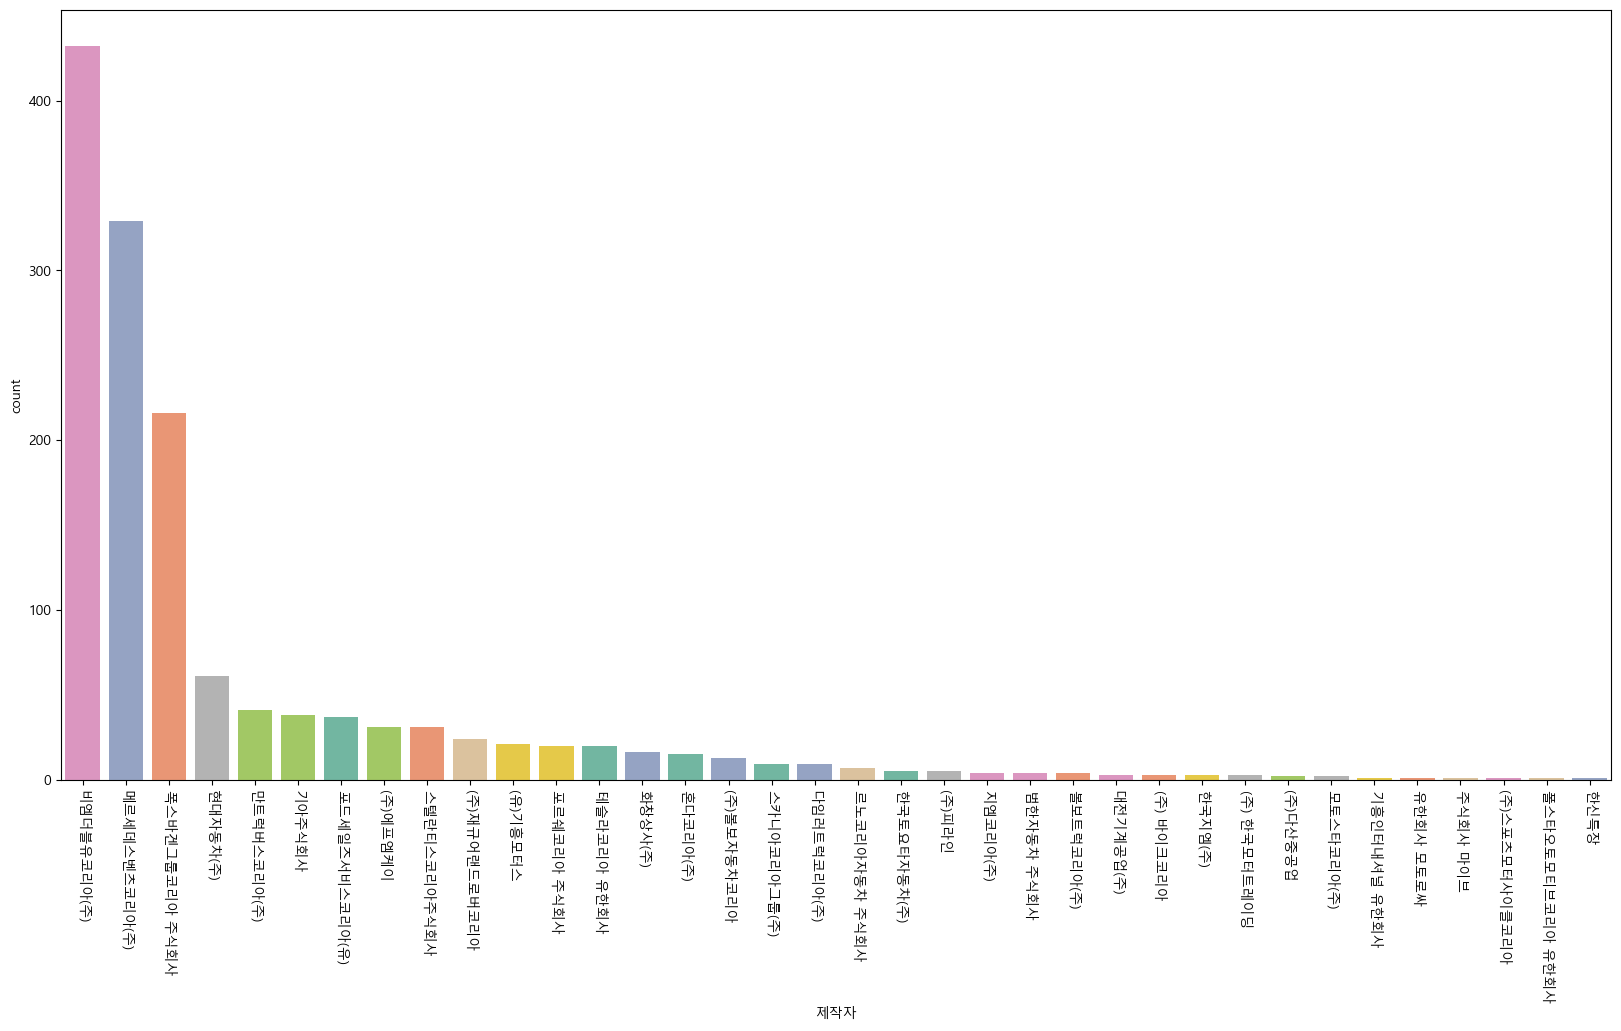

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '폭스바겐그룹코리아 주식회사', '현대자동차(주)',
       '만트럭버스코리아(주)', '기아주식회사', '포드세일즈서비스코리아(유)', '(주)에프엠케이', '스텔란티스코리아주식회사',
       '(주)재규어랜드로버코리아', '(유)기흥모터스', '포르쉐코리아 주식회사', '테슬라코리아 유한회사', '화창상사(주)',
       '혼다코리아(주)', '(주)볼보자동차코리아', '스카니아코리아그룹(주)', '다임러트럭코리아(주)',
       '르노코리아자동차 주식회사', '한국토요타자동차(주)', '(주)피라인', '지엠코리아(주)', '범한자동차 주식회사',
       '볼보트럭코리아(주)', '대전기계공업(주)', '(주) 바이크코리아', '한국지엠(주)', '(주) 한국모터트레이딩',
       '(주)다산중공업', '모토스타코리아(주)', '기흥인터내셔널 유한회사', '유한회사 모토로싸', '주식회사 마이브',
       '(주)스포츠모터사이클코리아', '폴스타오토모티브코리아 유한회사', '한신특장'],
      dtype='object', name='제작자')

In [11]:
tmp = pd.DataFrame(df.groupby("제작자").count()["차명"].sort_values(ascending=False))

plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='제작자', hue="제작자", legend=False, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()
tmp.index

## 3-2. 모델별 리콜 현황 출력

In [12]:
pd.DataFrame(df.groupby("차명").count()["start_Year"].
             sort_values(ascending=False)).rename(columns={"start_Year":"count"})

,count
차명,
328i,25
TGX,22
TGS,18
C 300,13
328xi,11
...,...
Golf 8 2.0 TDI,1
Golf 1.6 TDI BMT,1
GV70(JK1),1


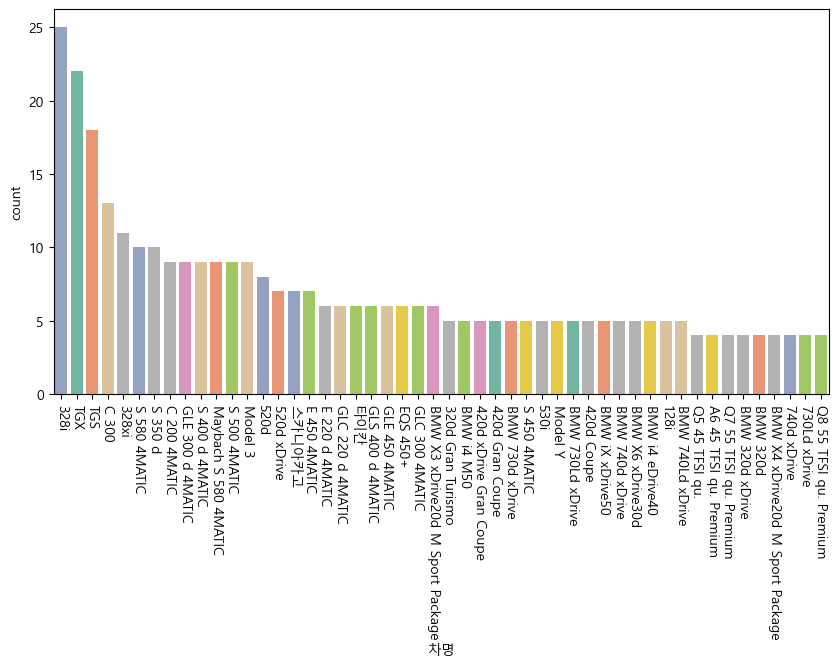

Index(['328i', 'TGX', 'TGS', 'C 300', '328xi', 'S 580 4MATIC', 'S 350 d',
       'C 200 4MATIC', 'GLE 300 d 4MATIC', 'S 400 d 4MATIC',
       'Maybach S 580 4MATIC', 'S 500 4MATIC', 'Model 3', '520d',
       '520d xDrive', '스카니아카고', 'E 450 4MATIC', 'E 220 d 4MATIC',
       'GLC 220 d 4MATIC', '타이칸', 'GLS 400 d 4MATIC', 'GLE 450 4MATIC',
       'EQS 450+', 'GLC 300 4MATIC', 'BMW X3 xDrive20d M Sport Package',
       '320d Gran Turismo', 'BMW i4 M50', '420d xDrive Gran Coupe',
       '420d Gran Coupe', 'BMW 730d xDrive', 'S 450 4MATIC', '530i', 'Model Y',
       'BMW 730Ld xDrive', '420d Coupe', 'BMW iX xDrive50', 'BMW 740d xDrive',
       'BMW X6 xDrive30d', 'BMW i4 eDrive40', '128i', 'BMW 740Ld xDrive',
       'Q5 45 TFSI qu.', 'A6 45 TFSI qu. Premium', 'Q7 55 TFSI qu. Premium',
       'BMW 320d xDrive', 'BMW 320d', 'BMW X4 xDrive20d M Sport Package',
       '740d xDrive', '730Ld xDrive', 'Q8 55 TFSI qu. Premium'],
      dtype='object', name='차명')

In [13]:
tmp = pd.DataFrame(df.groupby("차명").count()["start_Year"].
                   sort_values(ascending=False)).rename(columns={"start_Year":"count"}).iloc[:50]
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='차명', hue='차명', legend=False, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()
tmp.index

## 3-3. 월별 리콜 현황 출력

In [14]:
pd.DataFrame(df.groupby("recall_Month").count()["start_Year"]
             .sort_values(ascending=False)).rename(columns={"start_Year": "count"})

,count
recall_Month,
2,177
4,171
6,152
8,138
12,138
10,135
3,122
5,90
9,87


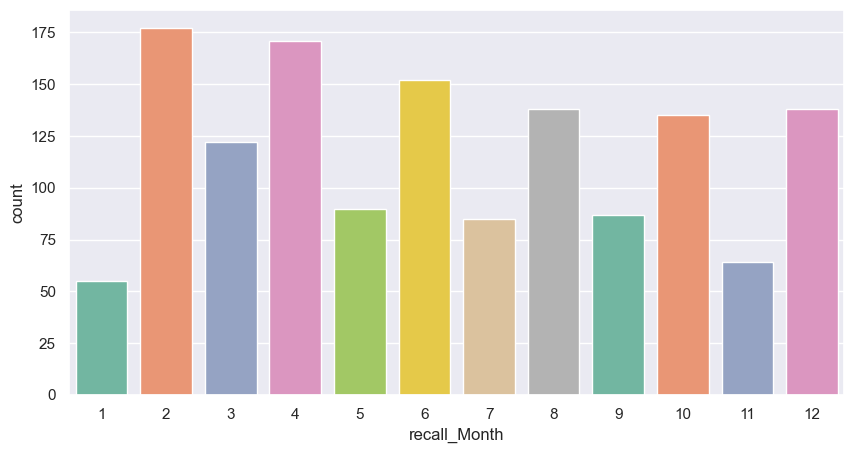

In [15]:
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x="recall_Month", hue="recall_Month", legend=False,palette="Set2")
plt.show()

## 3-4. 생산연도별 리콜 현황 출력

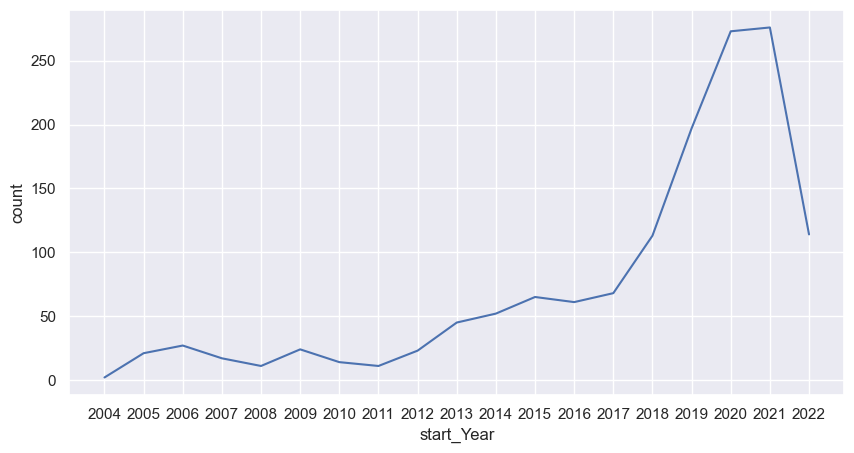

In [19]:
tmp = pd.DataFrame(df.groupby("start_Year").count()["차명"]
                  ).rename(columns={"차명": "count"})
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.lineplot(data=tmp, x="start_Year", y="count")
# 가로축 눈금을 1단위로 변경
plt.xticks(range(min(tmp.index), max(tmp.index)+1, 1))
plt.show()

In [17]:
tmp

,count
start_Year,
2004,2
2005,21
2006,27
2007,17
2008,11
2009,24
2010,14
2011,11
2012,23
